##                                                               Working with Decision Trees

# Problem Statement

For the given ‘Iris’ dataset, create the Decision Tree classifier and
visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict  the right class accordingly

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import graphviz
from sklearn.preprocessing import LabelEncoder
import pydotplus

In [2]:
# loading the data set
data=pd.read_csv("Iris.csv")
data.drop(['Id'],axis=1,inplace=True)

In [3]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Getting  to know the data

In [4]:
data.shape

(150, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
# NO null values 

In [10]:
le = LabelEncoder()
data['Species'] = le.fit_transform(data['Species'])

In [11]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
y=data['Species']


In [13]:
data.drop(['Species'],axis=1,inplace=True)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32

In [15]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
clf=DecisionTreeClassifier()
clf.fit(data,y)
clf.score(data,y)

1.0

# Using SKlearn plotting a tree

[Text(279.0, 498.3, 'PetalWidthCm <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(236.07692307692307, 407.70000000000005, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(321.9230769230769, 407.70000000000005, 'PetalWidthCm <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(171.69230769230768, 317.1, 'PetalLengthCm <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(85.84615384615384, 226.5, 'PetalWidthCm <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(42.92307692307692, 135.89999999999998, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(128.76923076923077, 135.89999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(257.53846153846155, 226.5, 'PetalWidthCm <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(214.61538461538458, 135.89999999999998, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(300.46153846153845, 135.89999999999998, 'SepalLengthCm <= 6.95\ngini = 0.444\nsamples = 3\

<Figure size 1800x1440 with 0 Axes>

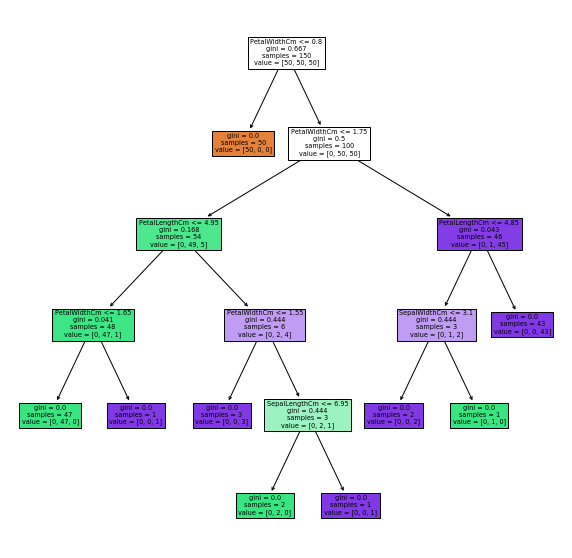

In [16]:
plt.figure(figsize=(25,20))
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text
features  = data.columns
plt.figure(figsize=(10,10))
plot_tree(clf, feature_names=features,filled = True)


In [21]:
# we can use any one 

### USing graphviz along with sklearn 

Graphviz it create an graph object , assemble the graph by adding nodes and edges

In [17]:
dot_data =tree.export_graphviz(clf, out_file=None, 
                         feature_names=data.columns,   
                         filled=True, rounded=True,  
                         special_characters=True,proportion=True)

In [18]:
graph = pydotplus.graph_from_dot_data(dot_data)

In [19]:
from IPython.display import Image

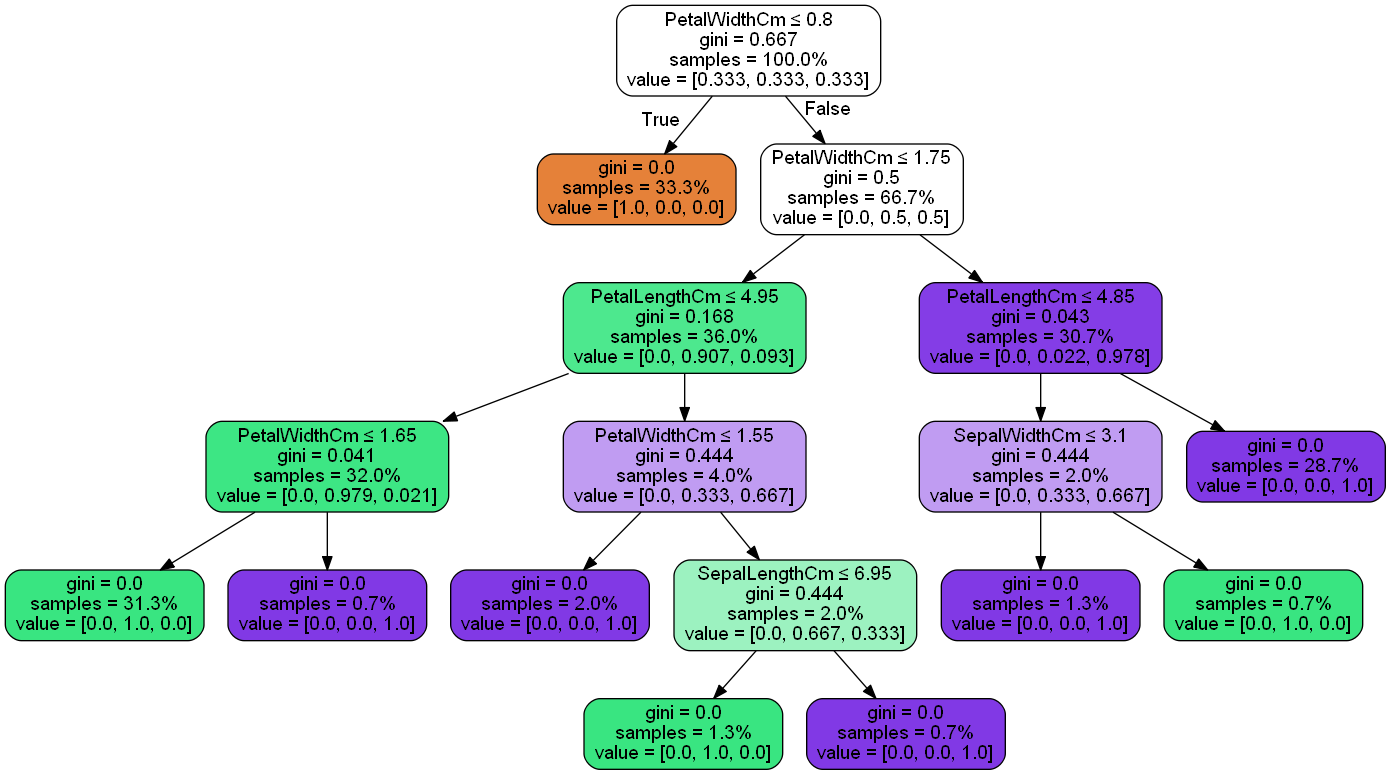

In [20]:
Image(graph.create_png())

# so now if we add any data to this data set it would classify according to there nodes and values